## Connect to the SQL database

In [49]:
import pandas as pd
import sqlite3
import plotly.express as px
plt_dimens = [500, 500]

In [2]:
# Connects to the divvy database
# divvy.db contains a table called "rides"
con = sqlite3.connect('divy.db')
cur = con.cursor()

## Databse Divy.db tables' content

In [3]:
# Table: Rides
rides_col = ['ride_id', 'rideable_type', 'start_station_name', 'end_station_name', 'stations_distance_m', 'member_casual']

# Table: Rides_duration
rides_duration_col = ['ride_id', 'member_casual', 'started_at', 'ended_at', 'duration', 'weekday']

# Table: Stations
stations_col = ['station_name', 'lat',	'lng']

## Total of member and casual rides

* Find out hom many casual and member used the service last years
* Total of rides gruped by member_vs_casual and classic_bike vs docked_bike vs electric_bike



In [4]:
# Group By Member and Casual

sum_member_casual = cur.execute("""
    SELECT Rides.member_casual, Rides.rideable_type, COUNT(Rides.ride_id) as total_users, SUM(CAST(Rides.stations_distance_m as INT))/1000 as dist, SUM(CAST(Rides_duration.duration as INT))/(60*60) as duration_hours
    FROM Rides
    LEFT JOIN Rides_duration ON Rides.ride_id = Rides_duration.ride_id
    GROUP BY Rides.member_casual, Rides.rideable_type
""").fetchall()

In [5]:
df_sum_member_casual = pd.DataFrame(data=sum_member_casual, columns=['member_casual', 'rideable_type', 'total_users', 'dist_km', 'duration_hours'])
df_sum_member_casual

,member_casual,rideable_type,total_users,dist_km,duration_hours
0,casual,classic_bike,1239420,2669237,538740
1,casual,docked_bike,300481,612469,251741
2,casual,electric_bike,482555,1175231,160087
3,member,classic_bike,1960181,3938280,441533
4,member,electric_bike,596372,1422909,117926


In [6]:
# Get a total of casuals and members

df_sum_member_casual.groupby(by='member_casual').sum()

,total_users,dist_km,duration_hours
member_casual,,,
casual,2022456,4456937,950568
member,2556553,5361189,559459


In [50]:
# Create the plots' views
plt_rides1 = px.pie(data_frame=df_sum_member_casual, values=df_sum_member_casual['total_users'], names=df_sum_member_casual['member_casual'], hole=0.5,
                    template="plotly_dark", title="Casual vs Member: number of rides (past 12 months)", height=plt_dimens[0], width=plt_dimens[1])

plt_rides2 = px.histogram(df_sum_member_casual, x='member_casual', y='dist_km', barmode="group", template="plotly_dark", text_auto=True, title="Casual vs Member: sum of distance in km", height=plt_dimens[0], width=plt_dimens[1])
plt_rides3 = px.histogram(df_sum_member_casual, x='member_casual', y='duration_hours', barmode="group", template="plotly_dark", text_auto=True, title="Casual vs Member: sum of ride duration in hours", height=plt_dimens[0], width=plt_dimens[1])
plt_rides4 = px.bar(df_sum_member_casual, x='member_casual', y='total_users', barmode="group", title="Rideable Type",
                          color='rideable_type', template="plotly_dark", text_auto=True, height=plt_dimens[0], width=plt_dimens[1])

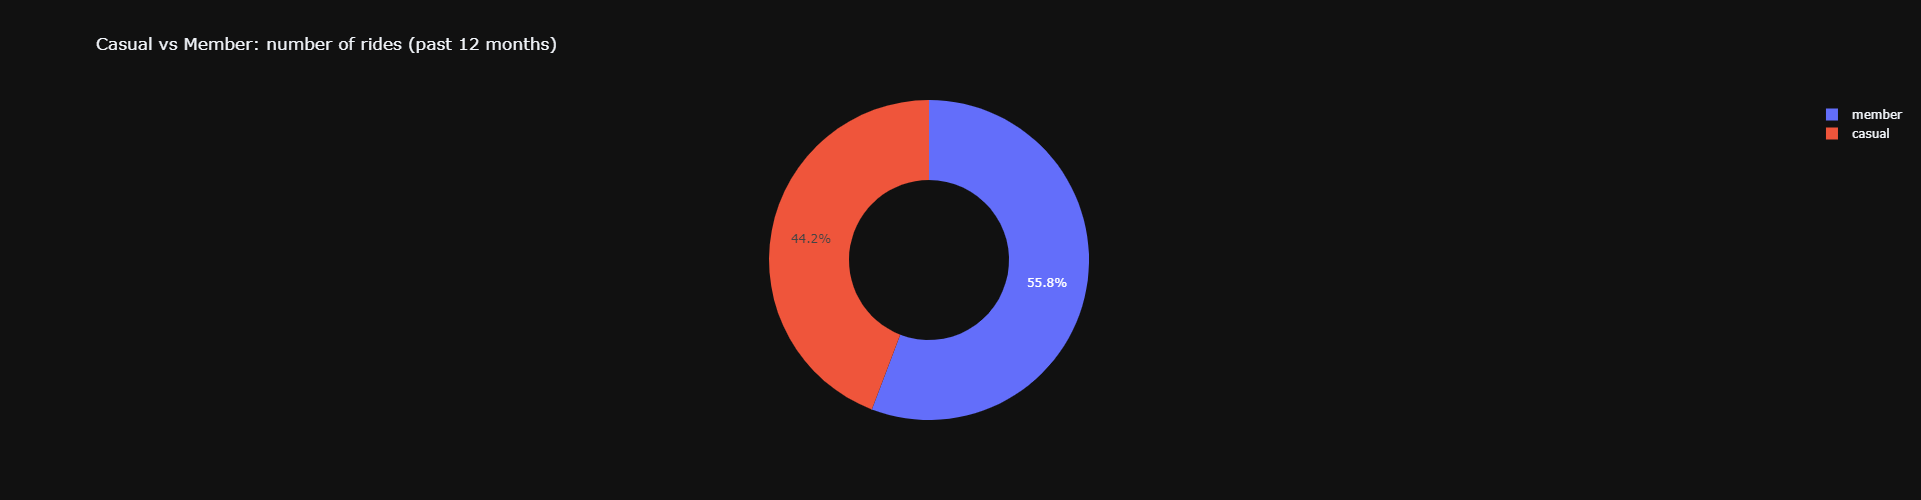

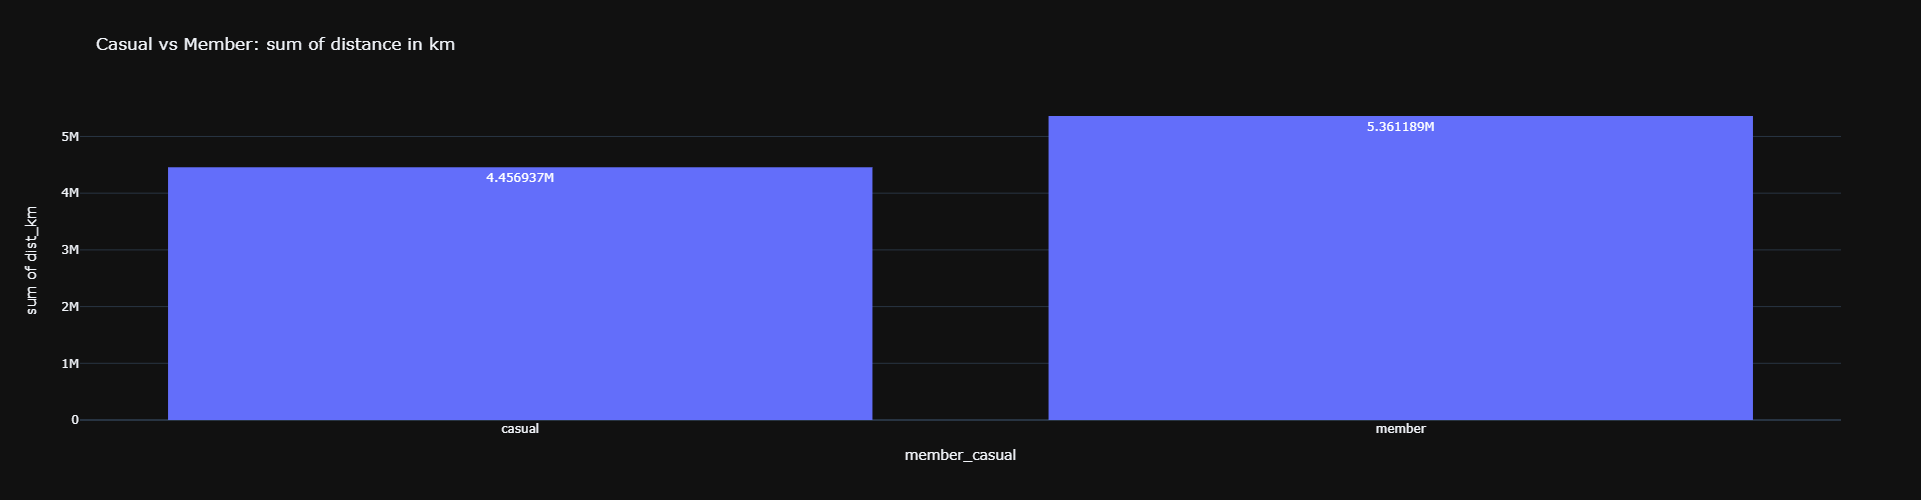

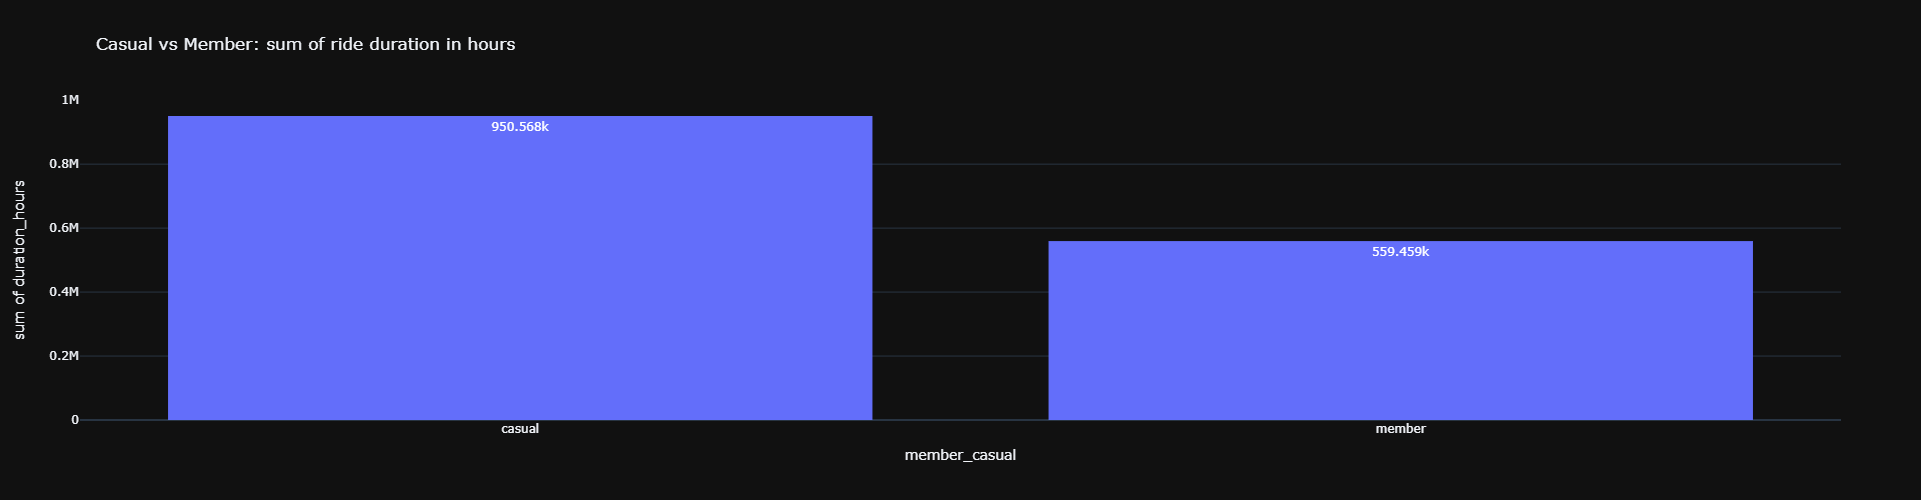

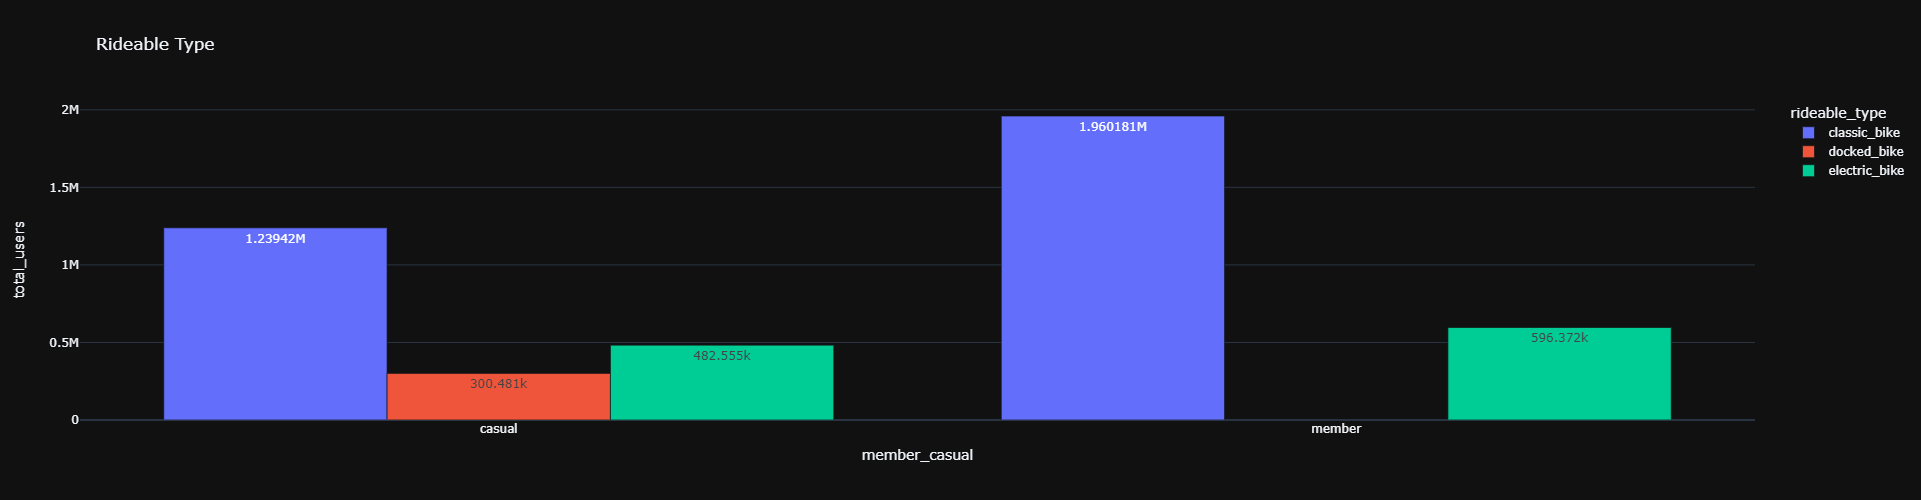

(None, None, None, None)

In [51]:
plt_rides1.show(), plt_rides2.show(), plt_rides3.show(), plt_rides4.show()

## Statistics from Member and Casual
* Standard Deviation
* Mean
* Mediam

In [9]:
# Select all rides
all_member_casual = cur.execute("""
    SELECT Rides.ride_id, Rides.member_casual, CAST(Rides.stations_distance_m as INT) as dist_m, 
    CAST(Rides_duration.duration as INT)/60 as duration_min
    FROM Rides
    LEFT JOIN Rides_duration ON Rides.ride_id = Rides_duration.ride_id
""").fetchall()

In [10]:
df_all_member_casual = pd.DataFrame(data=all_member_casual, columns=['ride_id', 'member_casual', 'dist_m', 'duration_min'])
df_all_member_casual

,ride_id,member_casual,dist_m,duration_min
0,47EC0A7F82E65D52,member,1067,6
1,8494861979B0F477,member,1185,6
2,EFE527AF80B66109,member,634,2
3,9F446FD9DEE3F389,member,1277,9
4,431128AD9AFFEDC0,member,4755,42
...,...,...,...,...
4579004,1B88F66E86C094DB,member,0,45
4579005,E73A038DA647AAFF,casual,0,67
4579006,4AD181F39CCB99ED,member,496,3
4579007,D6AE7BEA1D494E4B,member,0,36


### Separate members from casuals

In [11]:
# Separate members from casuals
only_casuals = df_all_member_casual[df_all_member_casual['member_casual'] == 'casual']
only_members = df_all_member_casual[df_all_member_casual['member_casual'] == 'member']

In [12]:
# Standar Deviation
sd_casuals_dist = round(only_casuals['dist_m'].dropna().std()/1000, 2)
sd_casuals_duration = round(only_casuals['duration_min'].std(), 2)

sd_members_dist = round(only_members['dist_m'].dropna().std()/1000, 2)
sd_members_duration = round(only_members['duration_min'].std(), 2)

In [13]:
# Mean
mean_casuals_dist = round(only_casuals['dist_m'].dropna().mean()/1000, 2)
mean_casuals_duration = round(only_casuals['duration_min'].mean(), 2)

mean_members_dist = round(only_members['dist_m'].dropna().mean()/1000, 2)
mean_members_duration = round(only_members['duration_min'].mean(), 2)

In [14]:
# Mediam
mediam_casuals_dist = round(only_casuals['dist_m'].dropna().median()/1000, 2)
mediam_casuals_duration = round(only_casuals['duration_min'].median(), 2)

mediam_members_dist = round(only_members['dist_m'].dropna().median()/1000, 2)
mediam_members_duration = round(only_members['duration_min'].median(), 2)

In [15]:
# Create a dataframe to print nicely the statistics

statistics_index = ['standard_deviation_distance_km', 'standard_deviation_duration_hrs', 'mean_distance_km', 'mean_duration_hrs', 'mediam_distance_km', 'mediam_duration_hrs']
statistics_col = ['measure', 'casual', 'member']
statistics_list = [
['dist', sd_casuals_dist, sd_members_dist],
['time', sd_casuals_duration, sd_members_duration],
['dist', mean_casuals_dist, mean_members_dist],
['time', mean_casuals_duration, mean_members_duration],
['dist', mediam_casuals_dist, mediam_members_dist],
['time', mediam_casuals_duration, mediam_members_duration]
]

df_statisctics = pd.DataFrame(data=statistics_list ,columns=statistics_col, index=statistics_index)
df_statisctics['casual/member']= round(df_statisctics['casual'] / df_statisctics['member'], 2)
df_statisctics

,measure,casual,member,casual/member
standard_deviation_distance_km,dist,2.14,1.78,1.20
standard_deviation_duration_hrs,time,48.93,17.27,2.83
mean_distance_km,dist,2.20,2.10,1.05
mean_duration_hrs,time,27.71,12.64,2.19
mediam_distance_km,dist,1.71,1.57,1.09
mediam_duration_hrs,time,16.00,9.00,1.78


### Statiscs visualization
Comapre the DataFrame 'df_statisctics' in bar graphs

In [16]:
# Separete distance from time

df_statisctics_dist = df_statisctics[df_statisctics['measure'] == 'dist']
df_statisctics_time = df_statisctics[df_statisctics['measure'] == 'time']

In [52]:
plt_statistics1 = px.histogram(df_statisctics_dist, x=df_statisctics_dist.index, y=['casual', 'member'], barmode="group", template="plotly_dark", text_auto=True,
                               title="Casual vs Member: statistics x distance (km)", height=plt_dimens[0], width=plt_dimens[1])

plt_statistics2 = px.histogram(df_statisctics_time, x=df_statisctics_time.index, y=['casual', 'member'], barmode="group", template="plotly_dark", text_auto=True,
                               title="Casual vs Member: statistics x ride duration (hours)", height=plt_dimens[0], width=plt_dimens[1])

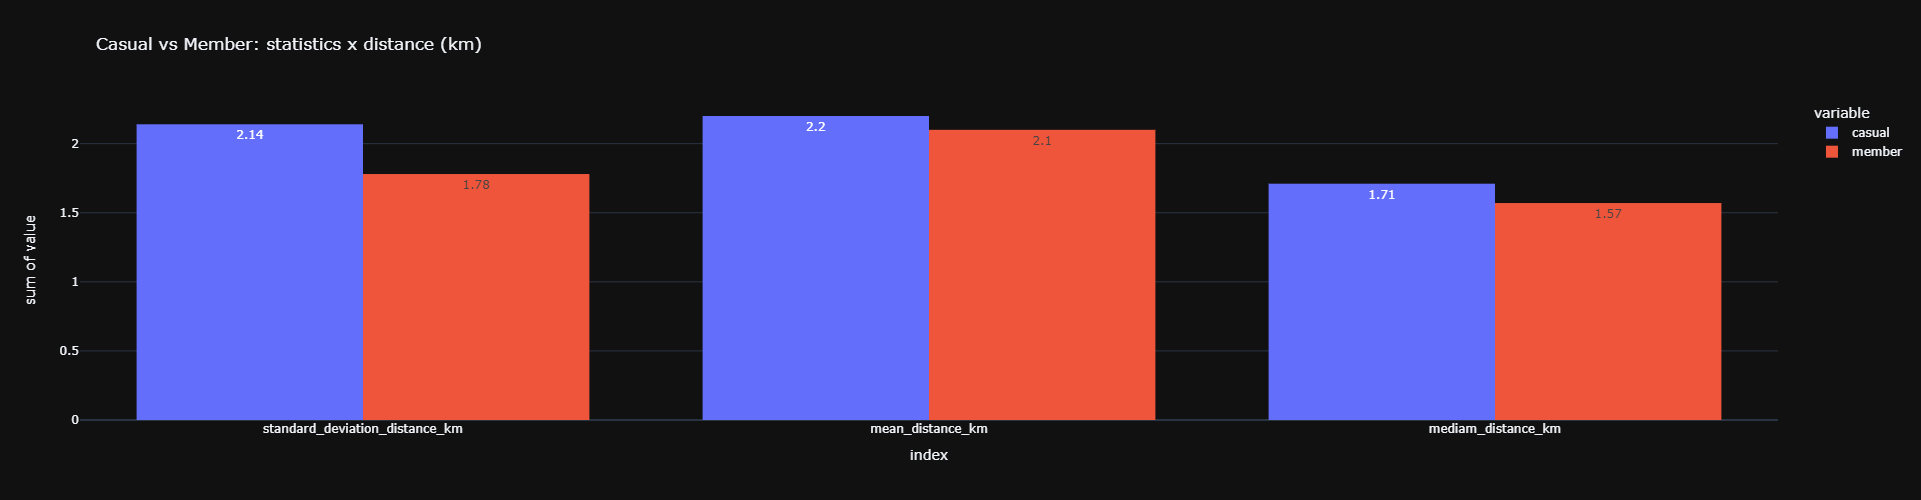

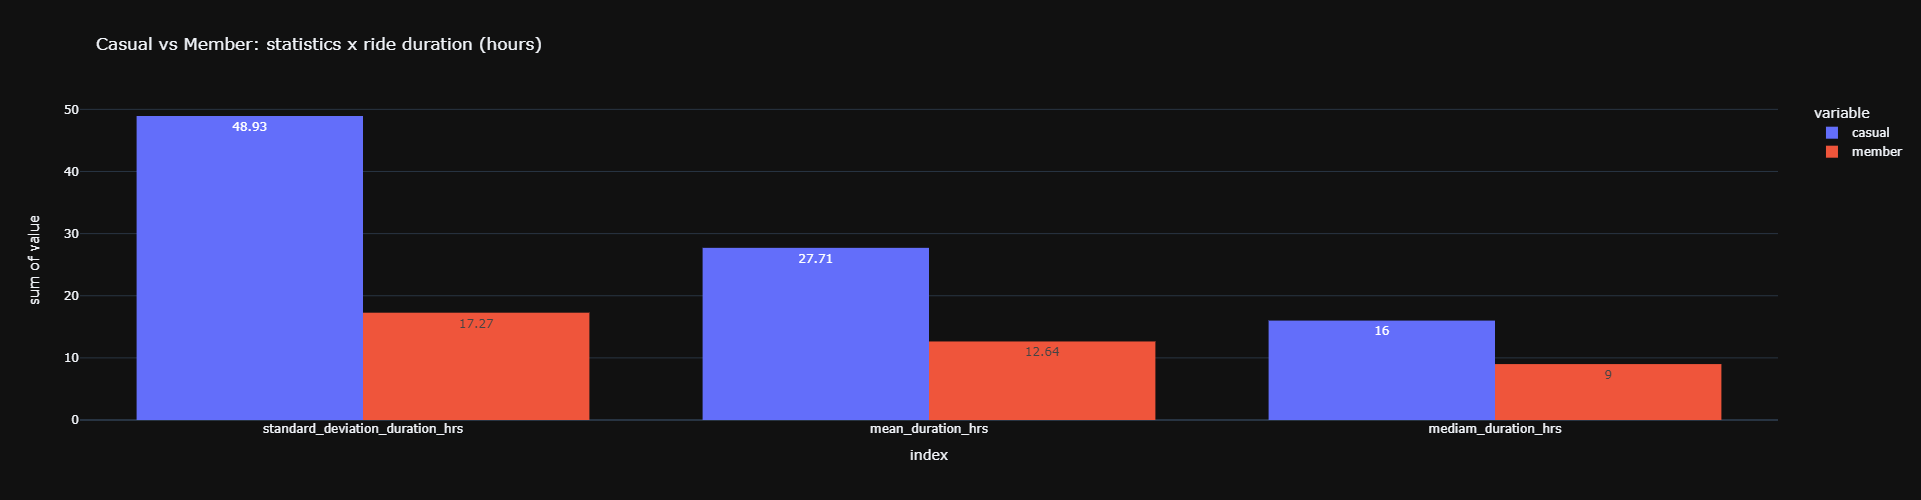

(None, None)

In [53]:
plt_statistics1.show(), plt_statistics2.show()

## How riders behaved over the las 12 months

### Seasons from United States of America
* spring runs from March 1 to May 31
* summer runs from June 1 to August 31
* autumn runs from September 1 to November 30
* winter runs from December 1 to February 28

GROUP BY month, member_casual, weekday

In [19]:
ride_time = cur.execute("""
SELECT strftime('%Y %m', started_at) as month, member_casual, weekday,

    CASE WHEN weekday = 0 THEN 'Monday'
        WHEN weekday = 1 THEN 'Tuesday'
        WHEN weekday = 2 THEN 'Wednesday'
        WHEN weekday = 3 THEN 'Thursday'
        WHEN weekday = 4 THEN 'Friday'
        WHEN weekday = 5 THEN 'Saturday'
        WHEN weekday = 6 THEN 'Sunday'
    END AS weekday_name, 
    
    COUNT(ride_id) as rides
    
FROM Rides_duration
GROUP BY month, weekday_name, member_casual
ORDER BY month, member_casual, weekday
""").fetchall()

In [20]:
df_ride_time = pd.DataFrame(data=ride_time, columns=['month', 'member_casual', 'weekday', 'weekday_name', 'rides'])

In [21]:
df_ride_time

,month,member_casual,weekday,weekday_name,rides
0,2021 04,casual,0,Monday,13932
1,2021 04,casual,1,Tuesday,17723
2,2021 04,casual,2,Wednesday,10240
3,2021 04,casual,3,Thursday,10334
4,2021 04,casual,4,Friday,19590
...,...,...,...,...,...
163,2022 03,member,2,Wednesday,27819
164,2022 03,member,3,Thursday,24214
165,2022 03,member,4,Friday,15040
166,2022 03,member,5,Saturday,14519


In [54]:
plt_ride_time1 = px.histogram(df_ride_time, x='month', y='rides', color='member_casual', barmode="group", template="plotly_dark", text_auto=True,
                               title="Casual vs Member: rides over the past 12 months", height=plt_dimens[0]*1.25, width=plt_dimens[1]*3)

plt_ride_time2 = px.line(df_ride_time[df_ride_time['member_casual'] == 'casual'], x='month', y='rides', color='weekday_name', template="plotly_dark", line_shape='spline',
                               title="CASUALS: rides over the past 12 months per week", height=plt_dimens[0]*1.25, width=plt_dimens[1]*3)

plt_ride_time3 = px.line(df_ride_time[df_ride_time['member_casual'] == 'member'], x='month', y='rides', color='weekday_name', template="plotly_dark", line_shape='spline',
                               title="CASUALS: rides over the past 12 months per week", height=plt_dimens[0]*1.25, width=plt_dimens[1]*3)

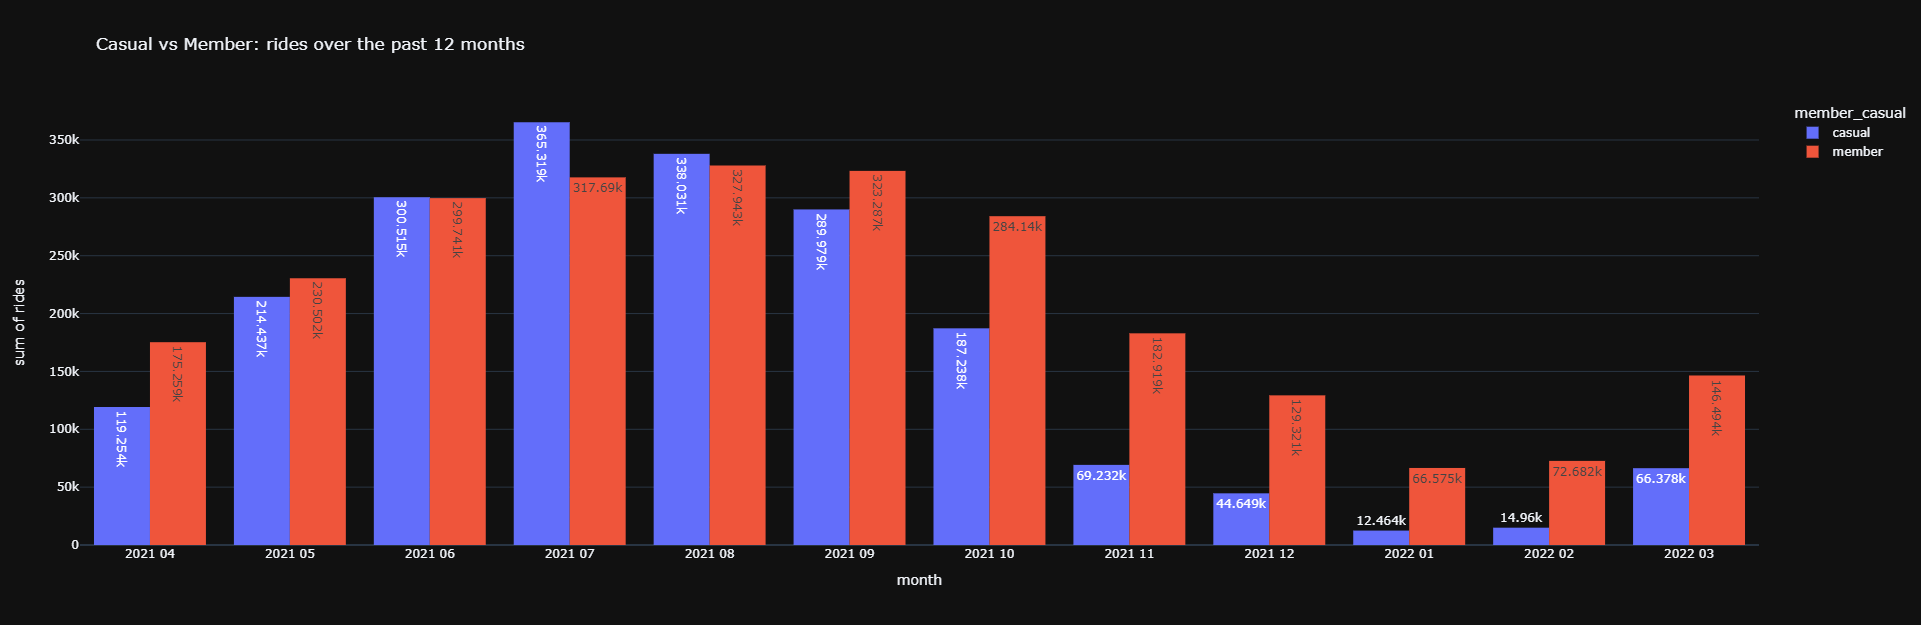

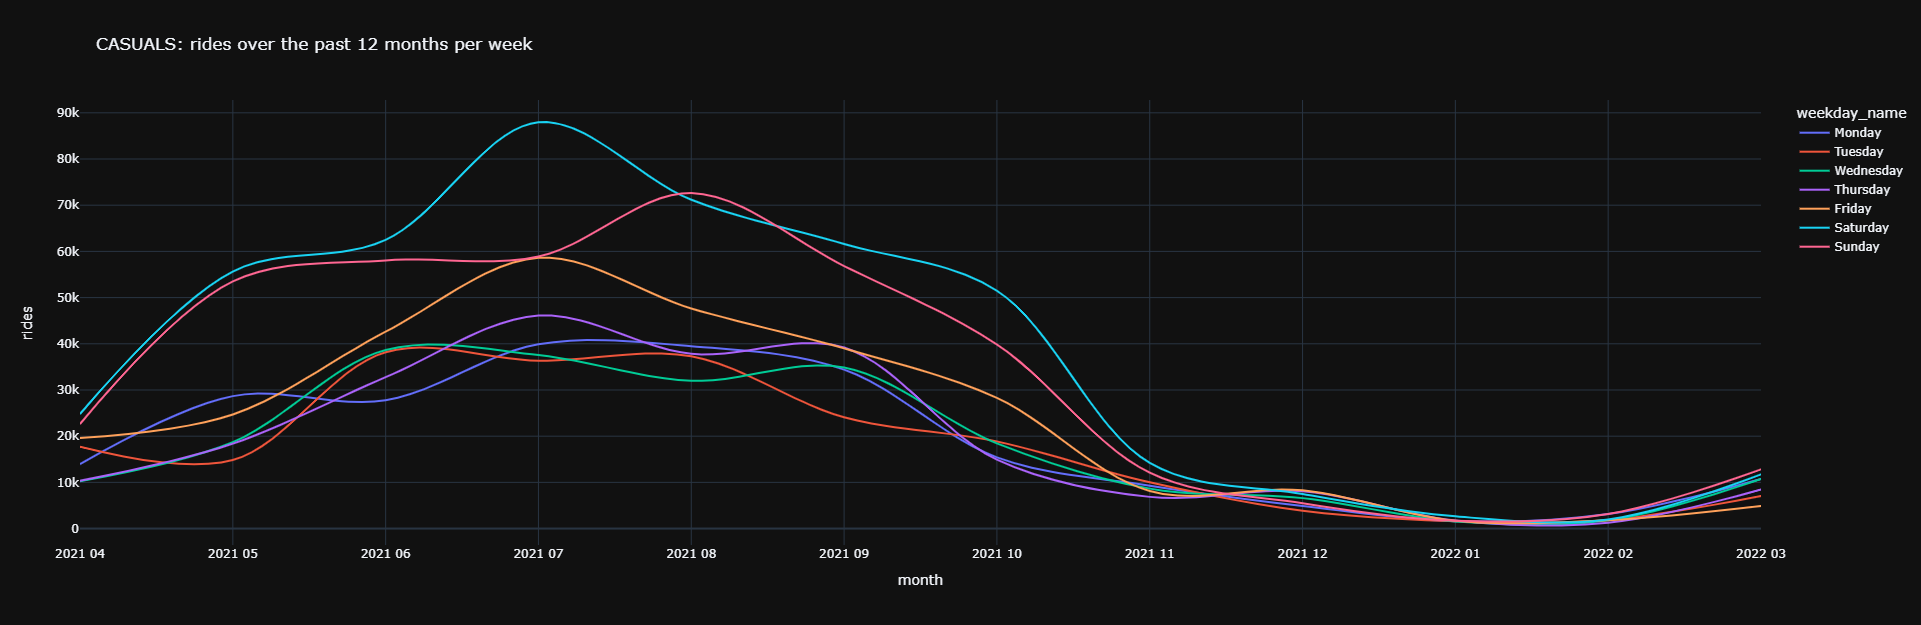

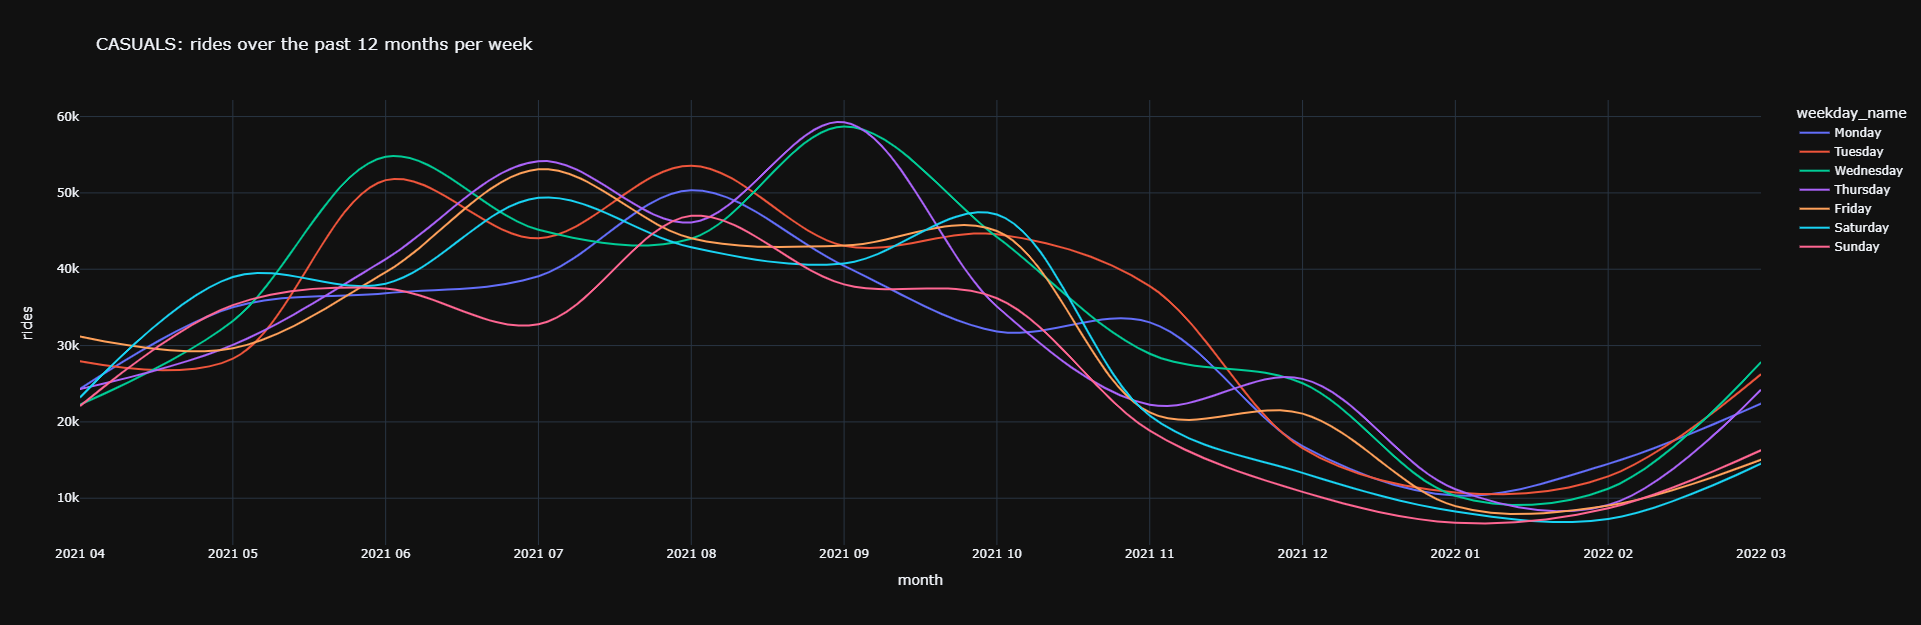

(None, None, None)

In [55]:
plt_ride_time1.show(), plt_ride_time2.show(), plt_ride_time3.show()

# Export tables

In [56]:
exported_folder = r'exported_data/'

In [63]:
df_sum_member_casual.to_csv(f"{exported_folder}data_sum_member_casual.csv", index=False)

In [62]:
df_statisctics.to_csv(f"{exported_folder}data_statistics.csv")

In [64]:
df_ride_time.to_csv(f"{exported_folder}data_ride_time.csv")